## RF linac example



In [9]:
from abel import *
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Define the linac and beams

In [10]:
# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C] bunch charge (not train)
source.energy = 5e9 # [eV]
source.rel_energy_spread = 0.02
source.bunch_length = 18e-6 # [m]
source.emit_nx, source.emit_ny = 160e-6, 0.56e-6 # [m rad]
source.beta_x = 1
source.beta_y = source.beta_x
source.num_particles = 5000
source.num_bunches_in_train = 312
source.bunch_separation = 0.5e-9

beam = source.track()
print(beam.train_duration())
print(-beam.average_current_train())

1.555e-07
3.2043532679999993


In [11]:
#Examples of RFAccelerators

#Multi structure linacs
driverLinac = RFAccelerator_TW_CLICG(length=500,num_structures=2500, gradient=100e6, beam_pulse_length=beam.train_duration(), beam_current=abs(beam.average_current_train()))
#driverLinac = RFAccelerator_TW_CLICG(num_rf_cells=100, f0_scaleto=6.0, length=500,num_structures=100, gradient=100e6, beam_pulse_length=100e-9, beam_current=1)

#Single structure "linac"
#driverLinac = RFAccelerator_TW_CLICG(num_rf_cells=24, f0_scaleto=3.0, length=None, num_structures=1, gradient=100e6, beam_pulse_length=100e-9, beam_current=550)
#driverLinac = RFAccelerator_TW_CLIC502(num_rf_cells=25, f0_scaleto=3.0, length=None, num_structures=1, gradient=100e6, beam_pulse_length=100e-9, beam_current=1)


print("Linac fill factor =", driverLinac.fill_factor)
print("Total voltage =", driverLinac.get_voltage_total()/1e9, "[GV], per structure =", \
      driverLinac.get_voltage_structure()/1e6, "[MV]")
print("Power per structure =", driverLinac.get_structure_power()/1e6, "[MW]")
print("Total RF->beam Efficiency =", driverLinac.get_RF_efficiency()*100, "[%]")
print("Energy per structure =", driverLinac.get_structure_pulse_energy(), "[J]")
print("Max pulse length =", driverLinac.get_max_pulse_length()*1e9, "[ns]")

Linac fill factor = 0.9997914258558303
Total voltage = 49.9895712927915 [GV], per structure = 19.995828517116603 [MV]
Power per structure = 91.45467531369698 [MW]
Total RF->beam Efficiency = 46.624671865340304 [%]
Energy per structure = 21.36950183490444 [J]
Max pulse length = 0.0 [ns]


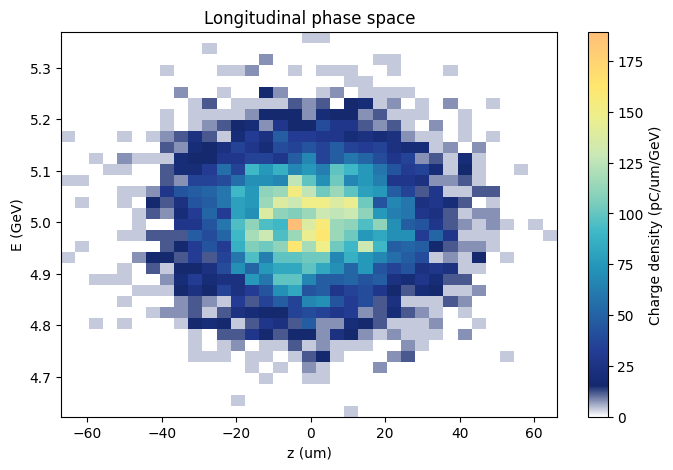

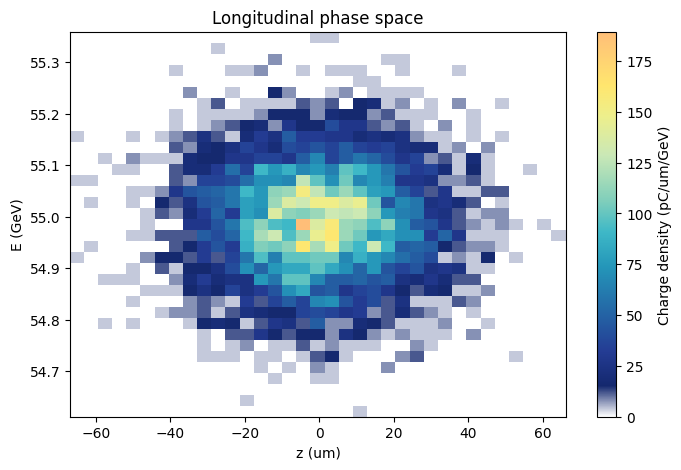

In [4]:
beam.plot_lps()
beam2 = driverLinac.track(beam)
beam2.plot_lps()

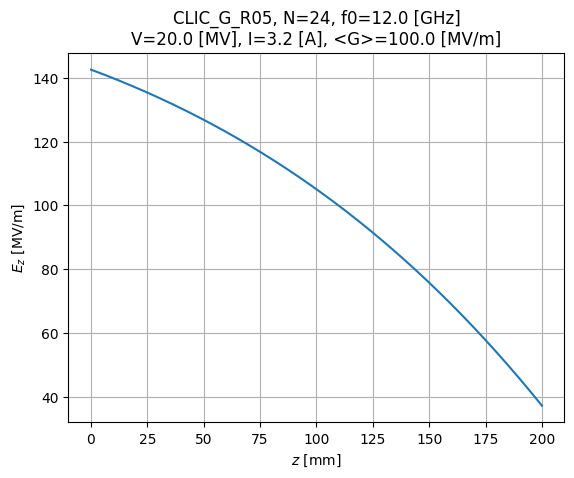

In [5]:
driverLinac.plot_gradient_profile()
plt.grid()

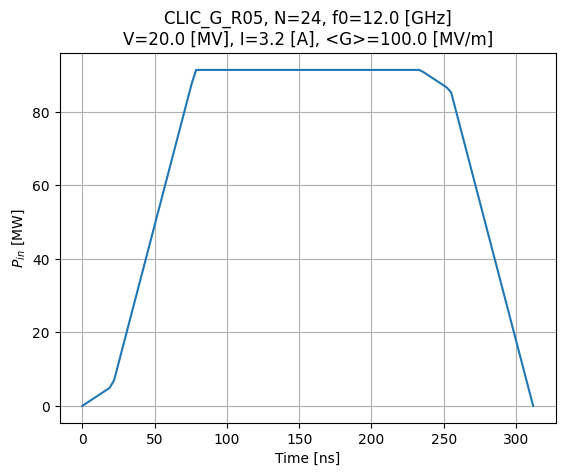

In [6]:
driverLinac.plot_power_profile()
plt.grid()
